In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import csv
import mlxtend.frequent_patterns
import mlxtend.preprocessing
from apyori import apriori

In [29]:
df = pd.read_csv('C:/Users/Shiwani Sabnis/PycharmProjects/DataMiningAssignment/pycharmMBA/CW1_Last_FM (1).csv')
print("df =",df.shape)
df.head()

df = (289955, 4)


,user,artist,sex,country
0,1,red hot chili peppers,f,Germany
1,1,the black dahlia murder,f,Germany
2,1,goldfrapp,f,Germany
3,1,dropkick murphys,f,Germany
4,1,le tigre,f,Germany


In [30]:
df.head(289955)

,user,artist,sex,country
0,1,red hot chili peppers,f,Germany
1,1,the black dahlia murder,f,Germany
2,1,goldfrapp,f,Germany
3,1,dropkick murphys,f,Germany
4,1,le tigre,f,Germany
...,...,...,...,...
289950,19718,bob dylan,f,Canada
289951,19718,pixies,f,Canada
289952,19718,the clash,f,Canada
289953,19718,a tribe called quest,f,Canada


In [31]:
#we can find the total count against each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289955 entries, 0 to 289954
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user     289955 non-null  int64 
 1   artist   289955 non-null  object
 2   sex      289955 non-null  object
 3   country  289955 non-null  object
dtypes: int64(1), object(3)
memory usage: 8.8+ MB


In [32]:
#finding out NANs in the table in order to treat them for better results
df.isna().sum()

user       0
artist     0
sex        0
country    0
dtype: int64

In [33]:
df['artist'] = df['artist'].str.strip() #removes spaces from the begining

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
print("User unique: ",len(df.user.unique()))
print("Artist unique: ",len(df.artist.unique()))
print("Country unique: ",len(df.country.unique()))

User unique:  15000
Artist unique:  1004
Country unique:  159


In [36]:
len(df.artist.unique()) #the DataSet contains 15K unique users from 159 countries and 1004 artists.

1004

In [37]:
df.sex.value_counts(normalize=True)

m    0.730539
f    0.269461
Name: sex, dtype: float64

In [38]:
df.artist.value_counts(normalize=True)

radiohead                0.009326
the beatles              0.009201
coldplay                 0.008201
red hot chili peppers    0.006160
muse                     0.005901
                           ...   
böhse onkelz             0.000341
schandmaul               0.000338
toto                     0.000338
thin lizzy               0.000331
mary j. blige            0.000331
Name: artist, Length: 1004, dtype: float64

In [39]:
#select the relevant columns for the algorithm (user and artist)
df = df[['user','artist']]

In [40]:
transactions = []
for i in df['user'].unique():
    transactions.append(list(df[df['user'] == i]['artist'].values))
len(transactions)

15000

In [41]:
# values of the first 5 users in the list
transactions[0:5]

[['red hot chili peppers',
  'the black dahlia murder',
  'goldfrapp',
  'dropkick murphys',
  'le tigre',
  'schandmaul',
  'edguy',
  'jack johnson',
  'eluveitie',
  'the killers',
  'judas priest',
  'rob zombie',
  'john mayer',
  'the who',
  'guano apes',
  'the rolling stones'],
 ['devendra banhart',
  'boards of canada',
  'cocorosie',
  'aphex twin',
  'animal collective',
  'atmosphere',
  'joanna newsom',
  'air',
  'portishead',
  'massive attack',
  'broken social scene',
  'arcade fire',
  'plaid',
  'prefuse 73',
  'm83',
  'the flashbulb',
  'pavement',
  'goldfrapp',
  'amon tobin',
  'sage francis',
  'four tet',
  'max richter',
  'autechre',
  'radiohead',
  'neutral milk hotel',
  'beastie boys',
  'aesop rock',
  'mf doom',
  'the books'],
 ['tv on the radio',
  'tool',
  'kyuss',
  'dj shadow',
  'air',
  'a tribe called quest',
  'the cinematic orchestra',
  'beck',
  'bon iver',
  'röyksopp',
  'bonobo',
  'the decemberists',
  'snow patrol',
  'battles',
  't

In [42]:
association_rules = apriori(transactions, min_support=0.03, min_confidence=0.4, min_lift=2)
association_results = list(association_rules)

In [43]:
#Function to generate the DataSet
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))


Apriori = pd.DataFrame(inspect(association_results), columns = ['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])

Apriori['Transaction']= Apriori['LHS']+"--"+Apriori['RHS']
Apriori.sort_values(by='Lift',inplace=True,ascending=False)

In [44]:
Apriori

,LHS,RHS,Support,Confidence,Lift,Transaction
3,led zeppelin,pink floyd,0.032000,0.404040,3.850449,led zeppelin--pink floyd
0,bob dylan,the beatles,0.034467,0.497115,2.794877,bob dylan--the beatles
5,sigur rós,radiohead,0.034200,0.492795,2.733702,sigur rós--radiohead
6,the rolling stones,the beatles,0.030467,0.484110,2.721759,the rolling stones--the beatles
1,the killers,coldplay,0.041067,0.418194,2.637894,the killers--coldplay
2,david bowie,the beatles,0.031733,0.430769,2.421866,david bowie--the beatles
4,led zeppelin,the beatles,0.033467,0.422559,2.375706,led zeppelin--the beatles


In [45]:
encode_=mlxtend.preprocessing.TransactionEncoder()
encode_arr=encode_.fit_transform(transactions)
print(encode_arr)
encode_df=pd.DataFrame(encode_arr, columns=encode_.columns_)
print(encode_df.head())

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
   ...and you will know us by the trail of dead   2pac  3 doors down  \
0                                         False  False         False   
1                                         False  False         False   
2                                         False  False         False   
3                                         False  False         False   
4                                         False  False         False   

   30 seconds to mars    311  36 crazyfists     44  50 cent  65daysofstatic  \
0               False  False          False  False    False           False   
1               False  False          False  False    False           False   
2               False  False          False  False    False       

In [46]:
md=mlxtend.frequent_patterns.apriori(encode_df)
md_minsup=mlxtend.frequent_patterns.apriori(encode_df,
min_support=0.03,
use_colnames=True)
print(md_minsup.head(20))

     support               itemsets
0   0.030933         (3 doors down)
1   0.032800   (30 seconds to mars)
2   0.036867            ([unknown])
3   0.036733     (a perfect circle)
4   0.061400                (ac/dc)
5   0.033800            (aerosmith)
6   0.069600                  (air)
7   0.062733        (amy winehouse)
8   0.033867    (animal collective)
9   0.038400           (aphex twin)
10  0.035467         (apocalyptica)
11  0.047600          (arcade fire)
12  0.075467       (arctic monkeys)
13  0.042667        (avril lavigne)
14  0.042267         (beastie boys)
15  0.057467                 (beck)
16  0.042467               (beirut)
17  0.049200  (belle and sebastian)
18  0.030800         (billy talent)
19  0.063867                (björk)


In [47]:
# creating rules with lift metric
rules=mlxtend.frequent_patterns.association_rules(
md_minsup, metric="lift",min_threshold=0.08,support_only=False)
print(rules.head(20))

                antecedents              consequents  antecedent support  \
0             (the beatles)              (bob dylan)            0.177867   
1               (bob dylan)            (the beatles)            0.069333   
2                (coldplay)    (death cab for cutie)            0.158533   
3     (death cab for cutie)               (coldplay)            0.081333   
4                (coldplay)                   (muse)            0.158533   
5                    (muse)               (coldplay)            0.114067   
6                (coldplay)              (radiohead)            0.158533   
7               (radiohead)               (coldplay)            0.180267   
8                (coldplay)  (red hot chili peppers)            0.158533   
9   (red hot chili peppers)               (coldplay)            0.119067   
10               (coldplay)            (the beatles)            0.158533   
11            (the beatles)               (coldplay)            0.177867   
12          

In [48]:
rules.sort_values('lift', ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(led zeppelin),(pink floyd),0.079200,0.104933,0.032000,0.404040,3.850449,0.023689,1.501892
18,(pink floyd),(led zeppelin),0.104933,0.079200,0.032000,0.304956,3.850449,0.023689,1.324807
0,(the beatles),(bob dylan),0.177867,0.069333,0.034467,0.193778,2.794877,0.022135,1.154355
1,(bob dylan),(the beatles),0.069333,0.177867,0.034467,0.497115,2.794877,0.022135,1.634835
33,(sigur rós),(radiohead),0.069400,0.180267,0.034200,0.492795,2.733702,0.021689,1.616179


In [49]:
rules['LHS'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['LHS']>0.08].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,LHS
19,(led zeppelin),(pink floyd),0.079200,0.104933,0.032000,0.404040,3.850449,0.023689,1.501892,1
18,(pink floyd),(led zeppelin),0.104933,0.079200,0.032000,0.304956,3.850449,0.023689,1.324807,1
0,(the beatles),(bob dylan),0.177867,0.069333,0.034467,0.193778,2.794877,0.022135,1.154355,1
1,(bob dylan),(the beatles),0.069333,0.177867,0.034467,0.497115,2.794877,0.022135,1.634835,1
33,(sigur rós),(radiohead),0.069400,0.180267,0.034200,0.492795,2.733702,0.021689,1.616179,1


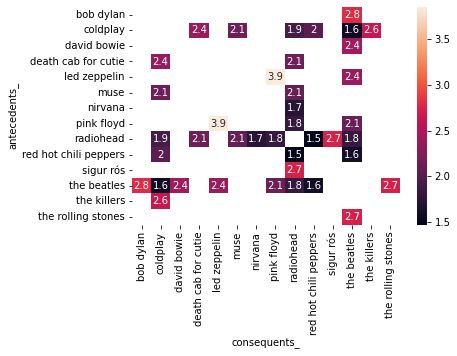

In [51]:
import seaborn as sns
# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['LHS']>0.08].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()